# <font color='darkorange'>**Hexbin map visualization 2**</font>

This notebook explains the process followed to obtain the hexbin map entailing the average duration of UFO sightings per state in the US. The original code can be found in Yan Holtz’s work available in Python Graph Gallery (<a href="https://www.python-graph-gallery.com/hexbin-map-from-geojson-python">link to source</a>).

In [2]:
# Setting things up.
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd

os.chdir('*** Change working directory here if needed ***')
data_folder = Path('data/')
img_folder = Path('img/')

In [3]:
# Loading the geoJson.
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)

In [4]:
# Setting the plot size.
plt.rcParams["figure.figsize"]=13,13

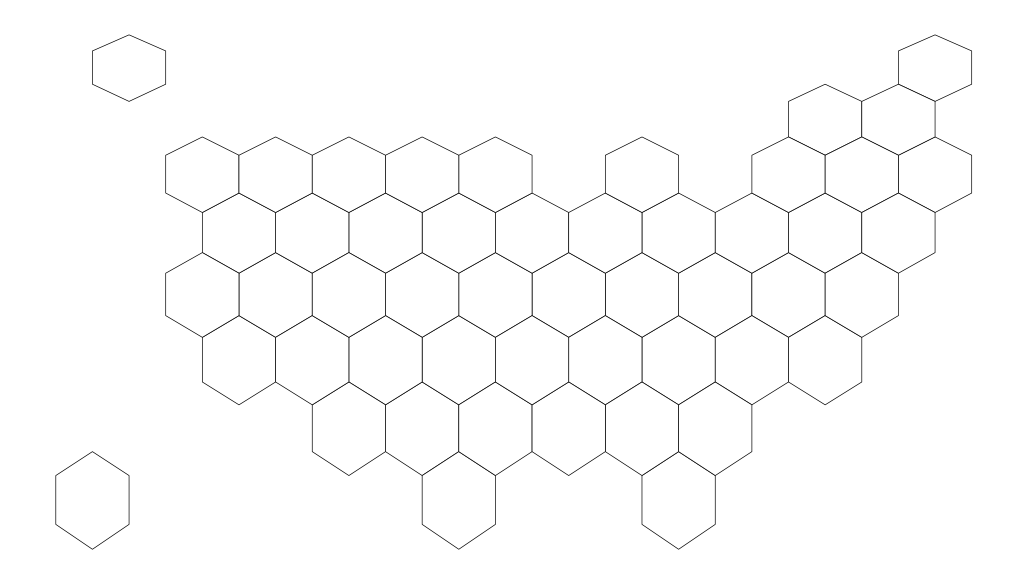

In [5]:
# Drawing a map.
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

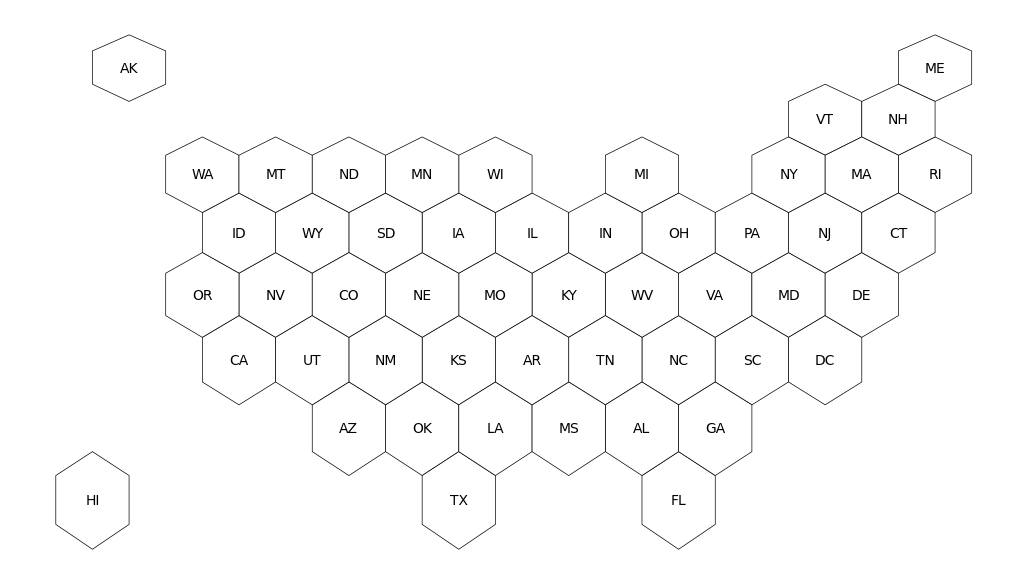

In [80]:
# Adding the state names.
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

for idx, row in geoData.iterrows():
    plt.annotate(text=row['iso3166_2'], xy=row['centroid'].coords[0], horizontalalignment='center', va='center')

In [6]:
# Adding a new column to the geo dataframe that will be used for joining.
geoData['state'] = geoData['google_name'].str.replace(' \(United States\)','')
print(list(geoData.keys()))
print(geoData.head(3))

['cartodb_id', 'created_at', 'updated_at', 'label', 'bees', 'iso3166_2', 'google_name', 'geometry', 'state']
   cartodb_id                created_at                updated_at  label  \
0        1219 2015-05-13 22:26:15+00:00 2015-10-05 16:00:16+00:00  Maine   
1        1217 2015-05-13 22:24:35+00:00 2015-10-05 16:00:16+00:00   R.I.   
2        1218 2015-05-13 22:25:00+00:00 2015-10-05 16:00:16+00:00    Vt.   

   bees iso3166_2                   google_name  \
0  60.5        ME         Maine (United States)   
1  47.8        RI  Rhode Island (United States)   
2  33.9        VT       Vermont (United States)   

                                            geometry         state  
0  POLYGON ((-72.62574 55.31320, -69.90286 54.408...         Maine  
1  POLYGON ((-72.62574 49.57439, -69.90286 48.544...  Rhode Island  
2  POLYGON ((-80.79436 52.53744, -78.07148 51.570...       Vermont  


/var/folders/4m/0vc6_pcd4t9bxgzklmf830080000gn/T/ipykernel_5865/1427987120.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  geoData['state'] = geoData['google_name'].str.replace(' \(United States\)','')


In [10]:
# Processing the alien dataframe to get the average duration of sightings per state.
alien_data = pd.read_csv(data_folder/'ufo_sighting_data.csv', header=0, delimiter=',', encoding='utf-8')

alien_data = alien_data.drop(columns=['Date_time', 'city', 'described_duration_of_encounter', 'description', 'date_documented', 'latitude', 'longitude'])
alien_data = alien_data.dropna()
alien_data = alien_data.drop(columns=['country'])
alien_data = alien_data.rename(columns={'state/province' : 'state'})
alien_data = alien_data.sort_values('state')
alien_data['state'] = alien_data['state'].replace({'al':'Alabama', 'ak':'Alaska', 'ar':'Arkansas', 'az':'Arizona', \
                                                    'ca':'California', 'co':'Colorado', 'ct':'Connecticut', 'dc':'District of Columbia', \
                                                    'de':'Delaware', 'fl':'Florida', 'ga':'Georgia', 'hi':'Hawaii', 'ia':'Iowa', \
                                                    'id':'Idaho', 'il':'Illinois', 'in':'Indiana', 'ks':'Kansas', 'ky':'Kentucky', \
                                                    'la':'Louisiana', 'ma':'Massachusetts', 'md':'Maryland', 'me':'Maine', \
                                                    'mi':'Michigan', 'mn':'Minnesota', 'mo':'Missouri', 'ms':'Mississippi', \
                                                    'mt':'Montana', 'ne':'Nebraska', 'nv':'Nevada', 'nh':'New Hampshire', \
                                                    'nj':'New Jersey', 'nm':'New Mexico', 'ny':'New York', 'nc':'North Carolina', \
                                                    'nd':'North Dakota', 'oh':'Ohio', 'ok':'Oklahoma', 'or':'Oregon', 'pa':'Pennsylvania', \
                                                    'ri':'Rhode Island', 'sc':'South Carolina', 'sd':'South Dakota', 'tn':'Tennessee', \
                                                    'tx':'Texas', 'ut':'Utah', 'vt':'Vermont', 'va':'Virginia', 'wa':'Washington', \
                                                    'wv':'West Virginia', 'wi':'Wisconsin', 'wy':'Wyoming'})
alien_data['length_of_encounter_seconds'] = alien_data['length_of_encounter_seconds'].astype(float)
alien_data = alien_data.groupby('state', as_index=False)['length_of_encounter_seconds'].mean()
alien_data = alien_data.drop(alien_data.index[51:66])
alien_data = alien_data.sort_values('length_of_encounter_seconds')

print('\t'*3,'\U0001F47D '*3)
print(list(alien_data.keys()))
print('\t'*3,'\U0001F47D '*3)
print(alien_data.head(5))

#alien_data.to_csv(data_folder/'sighting_average_duration.csv', sep='\t')

			 👽 👽 👽 
['state', 'length_of_encounter_seconds']
			 👽 👽 👽 
                   state  length_of_encounter_seconds
8   District of Columbia                   243.187500
20              Maryland                   841.166626
7               Delaware                   866.481818
13              Illinois                   872.056833
15                  Iowa                   917.153961


/var/folders/4m/0vc6_pcd4t9bxgzklmf830080000gn/T/ipykernel_6858/1570360226.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  alien_data = pd.read_csv(data_folder/'ufo_sighting_data.csv', header=0, delimiter=',', encoding='utf-8')


In [87]:
# Joining geo and alien dataframes.
geoData = geoData.set_index('state').join(alien_data.set_index('state'))

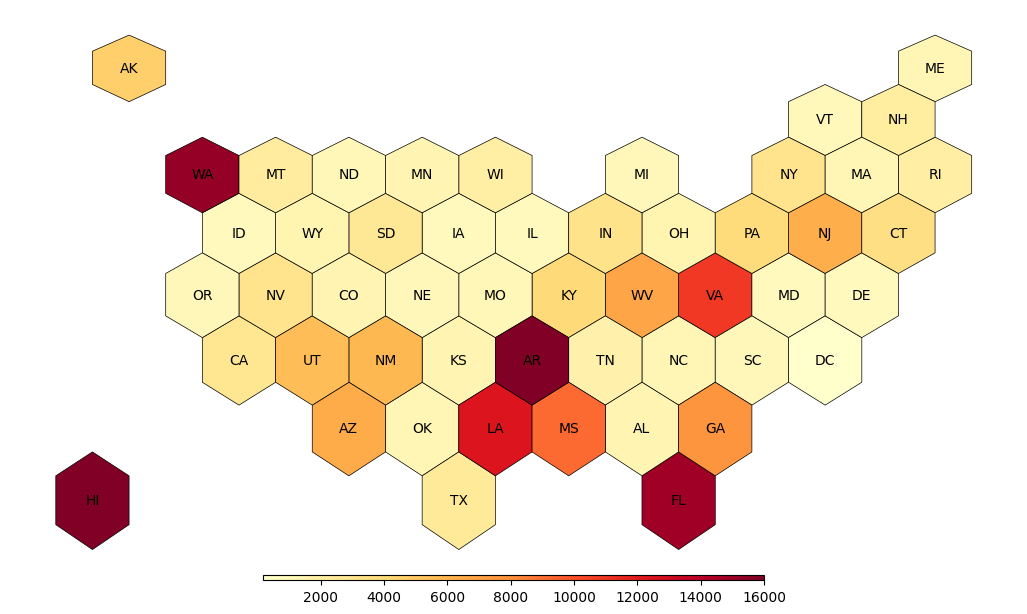

In [129]:
# Visualizing the data.
fig, ax = plt.subplots(1, figsize=(13, 13))

geoData.plot(
    ax=ax,
    column='length_of_encounter_seconds', 
    cmap='YlOrRd',
    norm=plt.Normalize(vmin=200, vmax=16000),
    edgecolor='black', 
    linewidth=.5
);
ax.axis('off');

for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color='black'
    )

fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=200, vmax=16000), cmap='YlOrRd'), ax=ax, orientation='horizontal', aspect=100, fraction=0.005, pad=0 )
fig.savefig(img_folder/'duration_heatmap.png', dpi=300, bbox_inches='tight')
